Gabriela Cortés Olvera

A01751655

13 Noviembre 2023

**Momento de Retroalimentación:** Módulo 2 Implementación de un modelo de deep learning. (Portafolio Implementación)

**Instrucciones:**
Entregable: Implementación de un modelo de deep learning.


Crea un repositorio de github para este proyecto.
Selecciona un problema y consigue un dataset para resolver dicho problema.
Implementa una arquitectura de deep learning para solucionar el problema. Lo que se busca es que apliques correcta y efectivamente las técnicas vistas en el módulo.

Analiza los resultados de tu modelo set de pruebas y validación.
Mejora tu modelo usando técnicas de regularización, ajustando hiper parámetros, modificando la arquitectura de tu modelo o buscando otro modelo.
Documenta y explica cuáles son los cambios que funcionaron y por qué funcionaron.

Prueba tu implementación con un set de datos y realiza algunas predicciones. Las predicciones las puedes correr en consola o las puedes implementar con una interfaz gráfica apoyándote en los visto en otros módulos.
Después de la entrega intermedia se te darán correcciones que puedes incluir en tu entrega final.

# **Descripción de dataset**

**Link:** https://www.kaggle.com/datasets/maharshipandya/-cryptocurrency-historical-prices-dataset/

**Dataset:**

Este conjunto de datos recopila información histórica de más de 50 criptomonedas, detallando sus datos OHLC (Open High Low Close) desde mayo de 2013 hasta octubre de 2022, con una frecuencia diaria. Los precios están expresados en dólares. El formato del archivo es CSV.

Los datos fueron recopilados de kaggle que a su vez extrajo y depuró el dataset del sitio web de Coin Market Cap mediante el uso de scripts automatizados.

________

**El datatset propone hacer las siguientes investigaciones:**

- Análisis de series temporales para distintas criptomonedas, basado en la fecha.
- Predicción de los precios de diferentes criptomonedas en el futuro.
_________


**Descripción de Columnas**

- **open**: Precio de apertura en la fecha específica (hora UTC).
- **high**: Precio más alto alcanzado en la fecha específica (hora UTC).
- **low**: Precio más bajo alcanzado en la fecha específica (hora UTC).
- **close**: Precio de cierre en la fecha específica (hora UTC).
- **volume**: Cantidad de activos comprados o vendidos, expresada en la moneda base.
- **marketCap**: El valor total de todas las monedas minadas, calculado multiplicando la cantidad de monedas en circulación por el precio de mercado actual de una sola moneda.
- **timestamp**: Marca de tiempo UTC del día considerado.
- **crypto_name**: Nombre de la criptomoneda.
- **date**: Marca de tiempo convertida al formato de fecha.

# **Librerías y drive**

## Drive

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
#put your own path in google drive
#%cd "/content/drive/MyDrive/7 semestre/"
#!ls

#Lo mandamos de manera manual debido a que el reto se está robando mucho espacio de alamacenamiento en Drive

## Librerías

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
import keras
from keras import layers
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

# **Lectura de datos**

In [ ]:
df = pd.read_csv('/content/dataset.csv')
df.head()

,Unnamed: 0,open,high,low,close,volume,marketCap,timestamp,crypto_name,date
0,0,112.900002,118.800003,107.142998,115.910004,0.0,1.288693e+09,2013-05-05T23:59:59.999Z,Bitcoin,2013-05-05
1,1,3.493130,3.692460,3.346060,3.590890,0.0,6.229819e+07,2013-05-05T23:59:59.999Z,Litecoin,2013-05-05
2,2,115.980003,124.663002,106.639999,112.300003,0.0,1.249023e+09,2013-05-06T23:59:59.999Z,Bitcoin,2013-05-06
3,3,3.594220,3.781020,3.116020,3.371250,0.0,5.859436e+07,2013-05-06T23:59:59.999Z,Litecoin,2013-05-06
4,4,112.250000,113.444000,97.699997,111.500000,0.0,1.240594e+09,2013-05-07T23:59:59.999Z,Bitcoin,2013-05-07


# **Exploración de datos**

In [ ]:
# Tipo de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72946 entries, 0 to 72945
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   72946 non-null  int64  
 1   open         72946 non-null  float64
 2   high         72946 non-null  float64
 3   low          72946 non-null  float64
 4   close        72946 non-null  float64
 5   volume       72946 non-null  float64
 6   marketCap    72946 non-null  float64
 7   timestamp    72946 non-null  object 
 8   crypto_name  72946 non-null  object 
 9   date         72946 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 5.6+ MB


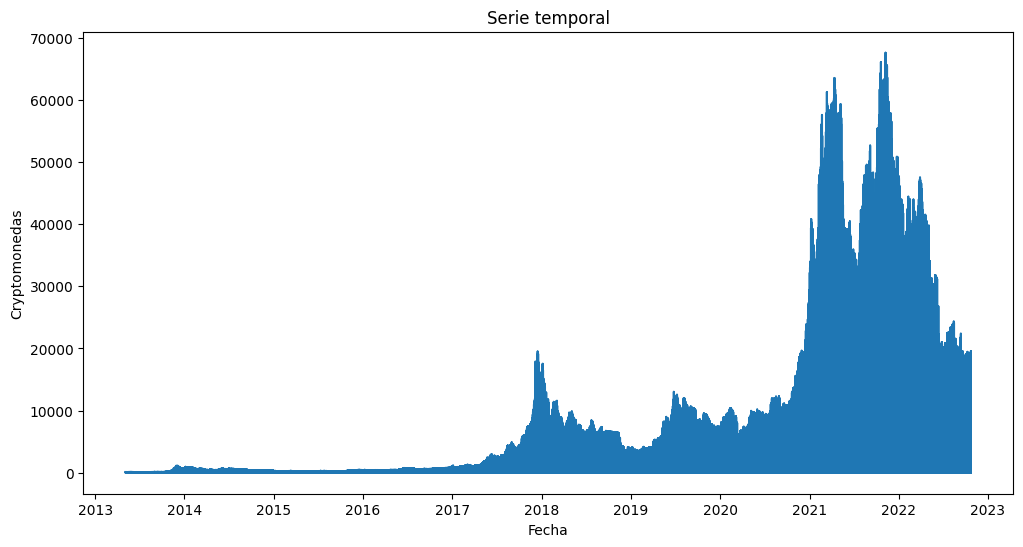

In [ ]:
# Conversión de valores
df['date'] = pd.to_datetime(df['date'])
df['close'] = pd.to_numeric(df['close'])

# Visualización de serie de tiempo
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['close'])
plt.title('Serie temporal')
plt.ylabel('Cryptomonedas')
plt.xlabel('Fecha')
plt.show()

In [ ]:
# Obtención del incio y fin del dataset para corroborar descripción de kaggle
fecha_inicio = df['date'].min()
fecha_final = df['date'].max()

print("Fecha de inicio:", fecha_inicio)
print("Fecha final:", fecha_final)

Fecha de inicio: 2013-05-05 00:00:00
Fecha final: 2022-10-23 00:00:00


In [ ]:
df.head()

,Unnamed: 0,open,high,low,close,volume,marketCap,timestamp,crypto_name,date
0,0,112.900002,118.800003,107.142998,115.910004,0.0,1.288693e+09,2013-05-05T23:59:59.999Z,Bitcoin,2013-05-05
1,1,3.493130,3.692460,3.346060,3.590890,0.0,6.229819e+07,2013-05-05T23:59:59.999Z,Litecoin,2013-05-05
2,2,115.980003,124.663002,106.639999,112.300003,0.0,1.249023e+09,2013-05-06T23:59:59.999Z,Bitcoin,2013-05-06
3,3,3.594220,3.781020,3.116020,3.371250,0.0,5.859436e+07,2013-05-06T23:59:59.999Z,Litecoin,2013-05-06
4,4,112.250000,113.444000,97.699997,111.500000,0.0,1.240594e+09,2013-05-07T23:59:59.999Z,Bitcoin,2013-05-07


In [ ]:
df['crypto_name'].value_counts()

Bitcoin                  3248
Litecoin                 3248
XRP                      3157
Dogecoin                 3024
Monero                   2866
Stellar                  2791
Tether                   2582
Ethereum                 2424
Ethereum Classic         2072
Basic Attention Token    1760
EOS                      1730
Bitcoin Cash             1708
BNB                      1706
TRON                     1656
Decentraland             1652
Chainlink                1649
Cardano                  1638
Maker                    1605
Filecoin                 1565
Theta Network            1530
Huobi Token              1513
Ravencoin                1478
Tezos                    1365
VeChain                  1332
Quant                    1325
USD Coin                 1266
Cronos                   1199
Wrapped Bitcoin          1152
Cosmos                   1109
Polygon                  1064
OKB                      1062
UNUS SED LEO             1041
Algorand                 1010
Chiliz    

Al obtener el recuento de las diversas criptomonedas presentes en la variable 'crypto_name', se opta por realizar un análisis más detallado focalizándose en las tres primeras (Bitcoin, Litecoin, XRP). Este enfoque permitirá construir una serie temporal más precisa y relevante para la variable que se está analizando.

## **Análisis Bitecoin**

In [ ]:
bitcoin = df[df['crypto_name']== 'Bitcoin']
print(bitcoin.shape)
bitcoin.head()

(3248, 10)


,Unnamed: 0,open,high,low,close,volume,marketCap,timestamp,crypto_name,date
0,0,112.900002,118.800003,107.142998,115.910004,0.0,1.288693e+09,2013-05-05T23:59:59.999Z,Bitcoin,2013-05-05
2,2,115.980003,124.663002,106.639999,112.300003,0.0,1.249023e+09,2013-05-06T23:59:59.999Z,Bitcoin,2013-05-06
4,4,112.250000,113.444000,97.699997,111.500000,0.0,1.240594e+09,2013-05-07T23:59:59.999Z,Bitcoin,2013-05-07
7,7,109.599998,115.779999,109.599998,113.566002,0.0,1.264049e+09,2013-05-08T23:59:59.999Z,Bitcoin,2013-05-08
9,9,113.199997,113.459999,109.260002,112.669998,0.0,1.254535e+09,2013-05-09T23:59:59.999Z,Bitcoin,2013-05-09


In [ ]:
# Se decide seguir con el análisis del dataset a partir del cierre de costo de moneda al día
print(bitcoin['close'].describe())

count     3248.000000
mean      9694.587144
std      15061.798756
min         68.431000
25%        450.111259
50%       3770.343509
75%       9707.213528
max      67566.830088
Name: close, dtype: float64


## **Análisis Litecoin**

In [ ]:
Litecoin = df[df['crypto_name']== 'Litecoin']
print(Litecoin.shape)
Litecoin.head()

(3248, 10)


,Unnamed: 0,open,high,low,close,volume,marketCap,timestamp,crypto_name,date
1,1,3.49313,3.69246,3.34606,3.59089,0.0,6.229819e+07,2013-05-05T23:59:59.999Z,Litecoin,2013-05-05
3,3,3.59422,3.78102,3.11602,3.37125,0.0,5.859436e+07,2013-05-06T23:59:59.999Z,Litecoin,2013-05-06
5,5,3.37087,3.40672,2.93979,3.33274,0.0,5.805127e+07,2013-05-07T23:59:59.999Z,Litecoin,2013-05-07
6,6,3.28362,3.49112,3.28362,3.40924,0.0,5.950822e+07,2013-05-08T23:59:59.999Z,Litecoin,2013-05-08
8,8,3.39940,3.44169,3.29485,3.41615,0.0,5.975557e+07,2013-05-09T23:59:59.999Z,Litecoin,2013-05-09


In [ ]:
# Se decide seguir con el análisis del dataset a partir del cierre de costo de moneda al día
print(Litecoin['close'].describe())

count    3248.000000
mean       56.507571
std        66.603849
min         1.157010
25%         3.845955
50%        40.728280
75%        77.883775
max       386.450779
Name: close, dtype: float64


## **XRP**

In [ ]:
XRP = df[df['crypto_name']== 'XRP']
print(XRP.shape)
XRP.head()

(3157, 10)


,Unnamed: 0,open,high,low,close,volume,marketCap,timestamp,crypto_name,date
183,183,0.005874,0.005927,0.005874,0.005882,0.0,4.598358e+07,2013-08-04T23:59:59.999Z,XRP,2013-08-04
187,187,0.005875,0.005980,0.005613,0.005613,0.0,4.387916e+07,2013-08-05T23:59:59.999Z,XRP,2013-08-05
190,190,0.005637,0.005661,0.004629,0.004680,0.0,3.659101e+07,2013-08-06T23:59:59.999Z,XRP,2013-08-06
191,191,0.004669,0.004682,0.004333,0.004417,0.0,3.453412e+07,2013-08-07T23:59:59.999Z,XRP,2013-08-07
195,195,0.004397,0.004424,0.004175,0.004254,0.0,3.325863e+07,2013-08-08T23:59:59.999Z,XRP,2013-08-08


In [ ]:
# Se decide seguir con el análisis del dataset a partir del cierre de costo de moneda al día
print(XRP['close'].describe())

count    3157.000000
mean        0.284035
std         0.370040
min         0.002810
25%         0.007799
50%         0.203442
75%         0.381006
max         3.377810
Name: close, dtype: float64


 # **Selección de variables de bitcoin**

 Se seleccionó este tipo de moneda debido a que es la más común en el dataset y se tiene una mejor descripción de la misma.

In [ ]:
# Se selecionan las variables que proveen mayor información del dataset
bitcoin = bitcoin[['crypto_name', 'date', 'close']]

In [ ]:
print(bitcoin.shape)
bitcoin.head()

(3248, 3)


,crypto_name,date,close
0,Bitcoin,2013-05-05,115.910004
2,Bitcoin,2013-05-06,112.300003
4,Bitcoin,2013-05-07,111.500000
7,Bitcoin,2013-05-08,113.566002
9,Bitcoin,2013-05-09,112.669998


# **Revisión - tratamiento de base de datos**

In [ ]:
# se puede observar que aparentemente no hay datos duplicados
duplicados = bitcoin.duplicated()
duplicados_r = bitcoin[duplicados]

print('Valores duplicados: ', duplicados.count())
print('Filas duplicadas: ', duplicados_r.count())

Valores duplicados:  3248
Filas duplicadas:  crypto_name    0
date           0
close          0
dtype: int64


In [ ]:
# Conteo del dataset
bitcoin.shape

(3248, 3)

In [ ]:
# Posteriormente de hace el conteo de las variables faltantes
#df.isnull().sum() #integer
bitcoin.isnull().sum()/bitcoin.shape[0]*100 #porcentaje

#Se puede observar que no hay datos nulos por lo que no es necesario hacer un tratamiento d elos mismos

crypto_name    0.0
date           0.0
close          0.0
dtype: float64

# **Modelo**

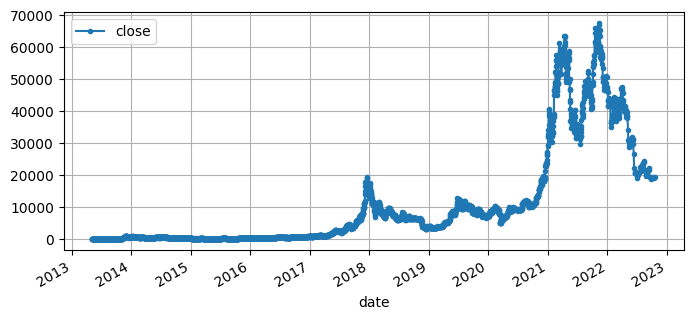

In [ ]:
#Para observar serie de tiempo de variable seleccionada
bitcoin.plot(x='date', y='close', grid=True, marker=".", figsize=(8, 3.5))
plt.show()

Como se observa en la serie de tiempo a partir del 2018 empezó a tener fuerza y valores significantes la moneda bitcoin, por lo anterior es que se decide hacer un recorte de fecha.

In [ ]:
# filtrado de fecha
inicio = pd.to_datetime('2018-01-01')
df_nuevo = bitcoin[bitcoin['date'] >= inicio]
print('El tamaño del nuevo df es: ', df_nuevo.shape)
df_nuevo.head()

El tamaño del nuevo df es:  (1546, 3)


,crypto_name,date,close
12711,Bitcoin,2018-01-01,13657.200195
12728,Bitcoin,2018-01-02,14982.099609
12747,Bitcoin,2018-01-03,15201.000000
12773,Bitcoin,2018-01-04,15599.200195
12790,Bitcoin,2018-01-05,17429.500000


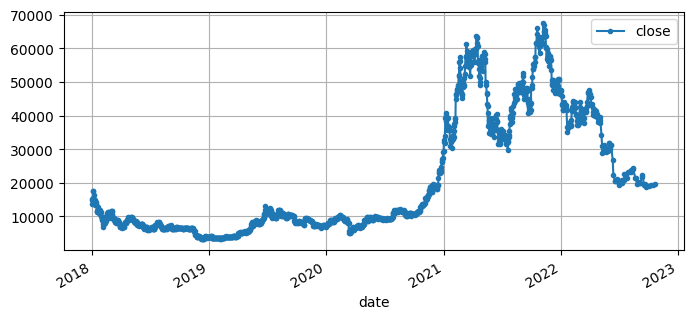

In [ ]:
#Para observar serie de tiempo de variable seleccionada con la selección de tiempo nueva
df_nuevo.plot(x='date', y='close', grid=True, marker=".", figsize=(8, 3.5))
plt.show()

## **Split de dataset**

In [ ]:
# Se verifica nuevamente que los datos que tenemos son valores únicos de fecha para poder hacer la división de valores
print(df_nuevo['date'].nunique())

1546


In [ ]:
# Fechas para cada conjunto
total_rows = len(df_nuevo)
train_end_index = int(total_rows * 0.7)
valid_end_index = int(total_rows * 0.85)

# Selecciona las fechas para cada conjunto
fecha_train = df_nuevo.iloc[:train_end_index]['date']
fecha_valid = df_nuevo.iloc[train_end_index:valid_end_index]['date']
fecha_test = df_nuevo.iloc[valid_end_index:]['date']

# Filtra las fechas de los conjuntos
train = df_nuevo[df_nuevo['date'].isin(fecha_train)]
valid = df_nuevo[df_nuevo['date'].isin(fecha_valid)]
test = df_nuevo[df_nuevo['date'].isin(fecha_test)]

# Se impime un head para corroborar que el split lo haya hecho correctamente
train.head()

,crypto_name,date,close
12711,Bitcoin,2018-01-01,13657.200195
12728,Bitcoin,2018-01-02,14982.099609
12747,Bitcoin,2018-01-03,15201.000000
12773,Bitcoin,2018-01-04,15599.200195
12790,Bitcoin,2018-01-05,17429.500000


In [ ]:
# Se impimen los intervalos para verificar que lo haya hecho de manera correcta
print("Train va de: ", train['date'].min(), "a", train['date'].max())
print("Val va de: ", valid['date'].min(), "a", valid['date'].max())
print("Test va de: ", test['date'].min(), "a", test['date'].max())

Train va de:  2018-01-01 00:00:00 a 2020-12-25 00:00:00
Val va de:  2020-12-26 00:00:00 a 2021-09-03 00:00:00
Test va de:  2021-09-04 00:00:00 a 2022-10-23 00:00:00


In [ ]:
# Código para hacer los batch al tamaño que se desea predecir
seq_length = 7
tf.random.set_seed(42)  # extra code – ensures reproducibility

train_ds = tf.keras.utils.timeseries_dataset_from_array(
    train['close'].to_numpy(),
    targets=train['close'][seq_length:],
    sequence_length=seq_length,
    batch_size=32,
    shuffle=True,
    seed=42
)

valid_ds = tf.keras.utils.timeseries_dataset_from_array(
    valid['close'].to_numpy(),
    targets=valid['close'][seq_length:],
    sequence_length=seq_length,
    batch_size=32
)

## **Modelo lineal**

Se realiza el modelo lineal para comparar sus resultados en un futuro contra RNN.

In [ ]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[seq_length])
])

early_stopping_cb = tf.keras.callbacks.EarlyStopping(
    monitor="val_mae", patience=50, restore_best_weights=True)

opt = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)

model.compile(loss=tf.keras.losses.Huber(), optimizer=opt, metrics=["mae"])

history = model.fit(train_ds, validation_data=test_ds, epochs=500,
                    callbacks=[early_stopping_cb])

Epoch 1/500
34/34 [==============================] - 10s 33ms/step - loss: 6941467.0000 - mae: 6941468.5000 - val_loss: 1175337.7500 - val_mae: 1175338.2500
Epoch 2/500
34/34 [==============================] - 1s 12ms/step - loss: 16744002.0000 - mae: 16744002.0000 - val_loss: 96856968.0000 - val_mae: 96856968.0000
Epoch 3/500
34/34 [==============================] - 0s 9ms/step - loss: 14526997.0000 - mae: 14526997.0000 - val_loss: 8115876.0000 - val_mae: 8115876.0000
Epoch 4/500
34/34 [==============================] - 0s 9ms/step - loss: 9734197.0000 - mae: 9734197.0000 - val_loss: 118650424.0000 - val_mae: 118650424.0000
Epoch 5/500
34/34 [==============================] - 0s 8ms/step - loss: 13711406.0000 - mae: 13711405.0000 - val_loss: 186365040.0000 - val_mae: 186365040.0000
Epoch 6/500
34/34 [==============================] - 0s 8ms/step - loss: 10686676.0000 - mae: 10686676.0000 - val_loss: 119850352.0000 - val_mae: 119850352.0000
Epoch 7/500
34/34 [==========================

In [ ]:
# Evaluación del modelo
test_loss, test_mae = model.evaluate(test_ds)
test_mae

8/8 [==============================] - 0s 8ms/step - loss: 1175337.7500 - mae: 1175338.2500


1175338.25

En los resultados se puede observar que el valor de pérdida y mae se encuentran muy altos por lo que se espera obervar una mejora visible en los siguientes modelos.

## **RNN**

### **First LSTM**

In [ ]:
tf.random.set_seed(42)  # extra code – ensures reproducibility

model = tf.keras.Sequential([
    tf.keras.layers.LSTM(1, input_shape=[None, 1])
])
# none es el tamaño de secuencia, puede trabajar con cualquiera

In [ ]:
def fit_and_evaluate(model, train_set, test_set, learning_rate, epochs=500):
    early_stopping_cb = tf.keras.callbacks.EarlyStopping(
        monitor="val_mae", patience=50, restore_best_weights=True)

    opt = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.9)
    model.compile(loss=tf.keras.losses.Huber(), optimizer=opt, metrics=["mae"])

    history = model.fit(train_set, epochs=epochs, validation_data=test_set,
                        callbacks=[early_stopping_cb])

    test_loss, test_mae = model.evaluate(test_set)
    return test_mae
# Para esta primer corrida se decide el optimizador de SGD el cual será modificado en la siguiente corrida.

In [ ]:
fit_and_evaluate(model, train_ds, test_ds, learning_rate=0.02)

Epoch 1/500
34/34 [==============================] - 3s 23ms/step - loss: 8528.2520 - mae: 8528.7520 - val_loss: 44855.9883 - val_mae: 44856.4844
Epoch 2/500
34/34 [==============================] - 0s 9ms/step - loss: 8528.2520 - mae: 8528.7529 - val_loss: 44855.9883 - val_mae: 44856.4844
Epoch 3/500
34/34 [==============================] - 0s 10ms/step - loss: 8528.2510 - mae: 8528.7520 - val_loss: 44855.9883 - val_mae: 44856.4844
Epoch 4/500
34/34 [==============================] - 0s 10ms/step - loss: 8528.2500 - mae: 8528.7500 - val_loss: 44855.9883 - val_mae: 44856.4844
Epoch 5/500
34/34 [==============================] - 0s 10ms/step - loss: 8528.2500 - mae: 8528.7510 - val_loss: 44855.9883 - val_mae: 44856.4844
Epoch 6/500
34/34 [==============================] - 0s 10ms/step - loss: 8528.2500 - mae: 8528.7510 - val_loss: 44855.9883 - val_mae: 44856.4844
Epoch 7/500
34/34 [==============================] - 0s 10ms/step - loss: 8528.2500 - mae: 8528.7510 - val_loss: 44855.9883 -

44856.484375

In [ ]:
# Evaluación del modelo
test_loss, test_mae = model.evaluate(test_ds)
test_mae

8/8 [==============================] - 0s 6ms/step - loss: 44855.9883 - mae: 44856.4844


44856.484375

Se puede observar que en las métricas hubo una buenaa mejora del modelo. Sin embargo, se intentará mejorar los resultados utilizando normalización de datos, cambio de optimizador a Adam y agregar más layers en la arquitectura del modelo.

### **Second LSTM**

In [ ]:
def build_model():
    model = tf.keras.Sequential([
        tf.keras.layers.LSTM(100, return_sequences=True, input_shape=[None, 1]),
        tf.keras.layers.LSTM(100, return_sequences=True),
        tf.keras.layers.LSTM(50),
        tf.keras.layers.Dense(100, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(50, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(1, activation='linear')
    ])
    return model

def compile_model(model, learning_rate=0.001):
    opt = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(loss=tf.keras.losses.Huber(), optimizer=opt, metrics=["mae"])

def fit_and_evaluate(model, train_set, valid_set, epochs=500):
    early_stopping_cb = tf.keras.callbacks.EarlyStopping(
        monitor="val_mae", patience=50, restore_best_weights=True)

    history = model.fit(train_set, validation_data=valid_set, epochs=epochs, callbacks=[early_stopping_cb])
    return history.history["val_mae"][-1]

In [ ]:
# Construye el modelo
model = build_model()
compile_model(model, learning_rate=0.001)

In [ ]:
# Entrenamiento del modelo
final_mae = fit_and_evaluate(model, train_ds, valid_ds, epochs=500)
print(f'Final MAE después del entrenamiento: {final_mae}')

Epoch 1/500
34/34 [==============================] - 10s 65ms/step - loss: 8528.0771 - mae: 8528.5781 - val_loss: 44855.6523 - val_mae: 44856.1523
Epoch 2/500
34/34 [==============================] - 1s 16ms/step - loss: 8527.5957 - mae: 8528.0957 - val_loss: 44855.0781 - val_mae: 44855.5781
Epoch 3/500
34/34 [==============================] - 1s 15ms/step - loss: 8526.8789 - mae: 8527.3799 - val_loss: 44854.2461 - val_mae: 44854.7461
Epoch 4/500
34/34 [==============================] - 1s 16ms/step - loss: 8525.8916 - mae: 8526.3916 - val_loss: 44853.1094 - val_mae: 44853.6094
Epoch 5/500
34/34 [==============================] - 1s 16ms/step - loss: 8524.6123 - mae: 8525.1123 - val_loss: 44851.6758 - val_mae: 44852.1719
Epoch 6/500
34/34 [==============================] - 1s 16ms/step - loss: 8523.0381 - mae: 8523.5381 - val_loss: 44849.9883 - val_mae: 44850.4844
Epoch 7/500
34/34 [==============================] - 1s 16ms/step - loss: 8521.1611 - mae: 8521.6611 - val_loss: 44848.1641

In [ ]:
# Realiza predicciones
predictions = model.predict(valid_ds)

8/8 [==============================] - 2s 10ms/step


In [ ]:
# Evalúa el modelo en el conjunto de prueba
valid_loss, valid_mae = model.evaluate(valid_ds)
print(f'Valid Loss: {valid_loss}, Valid MAE: {valid_mae}')

8/8 [==============================] - 0s 11ms/step - loss: 20680.0391 - mae: 20680.5391
Valid Loss: 20680.0390625, Valid MAE: 20680.5390625


Al optimizar la aquitectura del modelo se obtuvo un mejor valor en la métrica. Al obtener mejores resultados se probará la muestra de valicación con este modelo.

## **Prediction & Visualization**

1/1 [==============================] - 0s 60ms/step


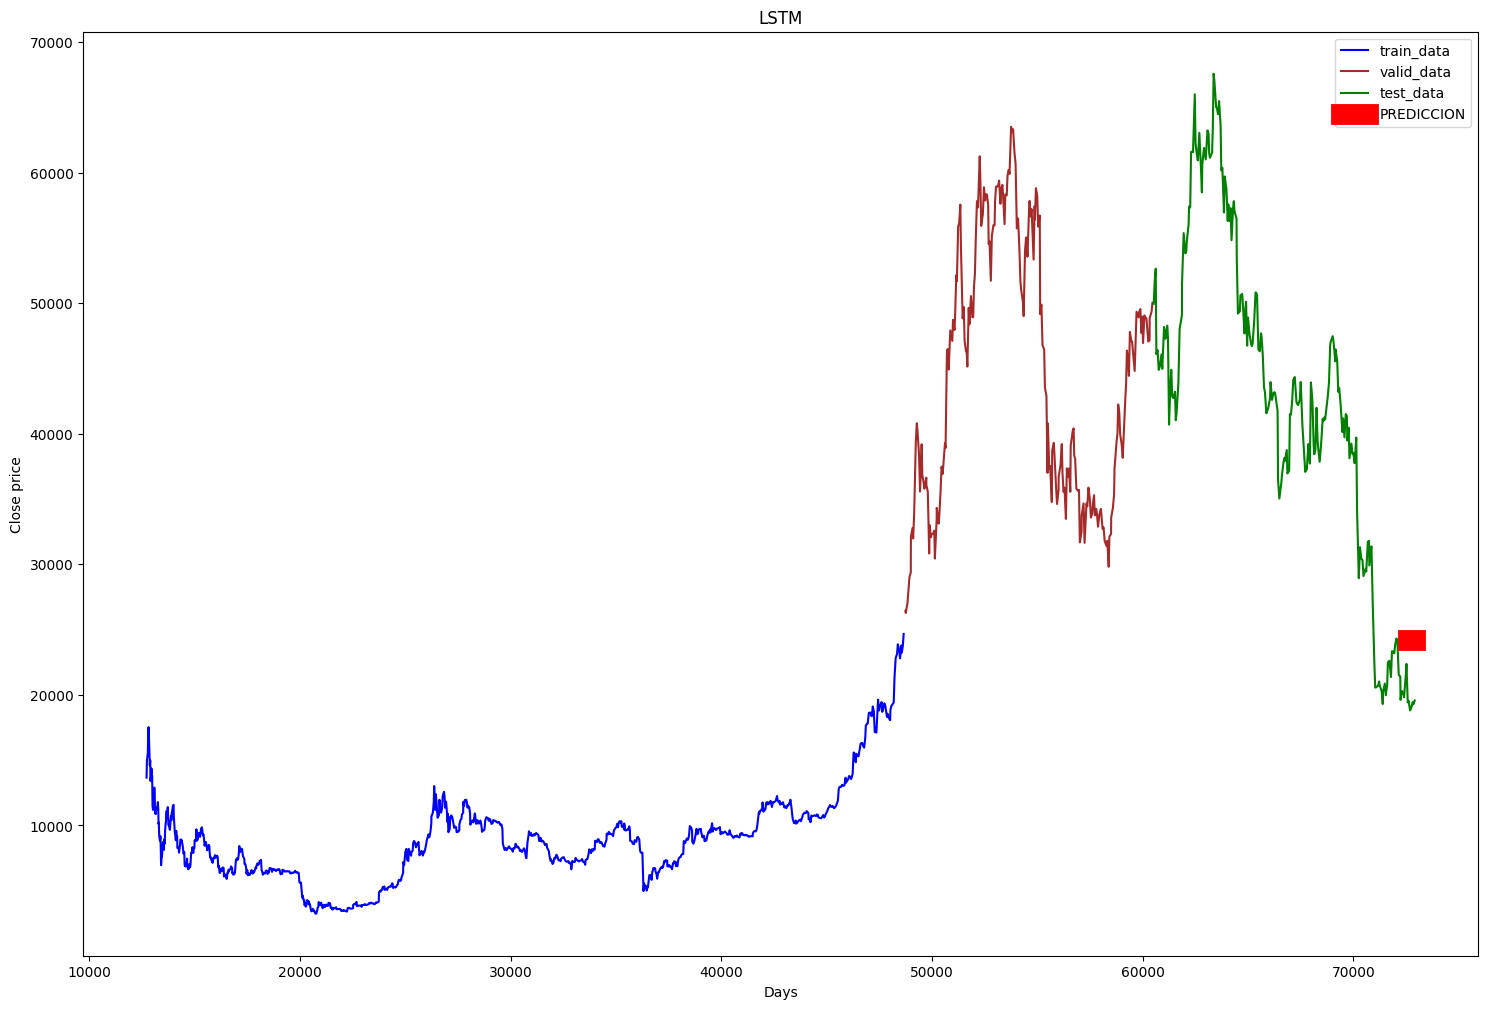

In [ ]:
r = valid[218:]

val_r = tf.keras.utils.timeseries_dataset_from_array(
    r['close'].to_numpy(),
    targets=r['close'][seq_length:],
    sequence_length=seq_length,
    batch_size=32
)

y_LSTM = model.predict(val_r)

fig, axs = plt.subplots(figsize=(18, 12), nrows=1, ncols=1)

# Plot for LSTM predictions
axs.plot(train.index, train.close, label="train_data", color="b")
axs.plot(valid.index, valid.close, label="valid_data", color="brown")
axs.plot(test.index, test.close, label="test_data", color="g")

axs.plot(test.index[225:], y_LSTM[:, 0], label="PREDICCION", color="red", linewidth=15)
axs.legend()
axs.set_title("LSTM")

plt.xlabel("Days")
plt.ylabel("Close price")

plt.show()

## **Prediction for new data**

Realizaremos un ejemplo pensando que los últimos 30 datos son los nuevos elementos que se desean introducir en la serie de tiempo y mostraremos como realizar de manera fácil la predicción.

In [ ]:
# Función necesaria para realizar predicciones sin validación
def fit_and_evaluate2(model, train_set, epochs=500):
    early_stopping_cb = tf.keras.callbacks.EarlyStopping(
        monitor="mae", patience=50, restore_best_weights=True)

    history = model.fit(train_set, epochs=epochs, callbacks=[early_stopping_cb])
    return history.history["mae"][-1]

In [ ]:
# Fechas para cada conjunto
total_rows = len(df_nuevo)
old_data_index = int(total_rows * 0.98)

# Selecciona las fechas para cada conjunto
fecha_old_data = df_nuevo.iloc[:old_data_index]['date']
fecha_new_data = df_nuevo.iloc[old_data_index:]['date']

# Obtención dataframe nuevo y viejo
old_data = df_nuevo[df_nuevo['date'].isin(fecha_old_data)]
new_data = df_nuevo[df_nuevo['date'].isin(fecha_new_data)]

# Función para predicción de nuevos valores
def predicciones(old_data, new_data):
  # Se pegan los nuevos valores al conjuto que ya se tenía
  df = pd.concat([old_data, new_data], axis=0)


  # Preparación de datos
  seq_length = 7
  tf.random.set_seed(42)

  train_ds = tf.keras.utils.timeseries_dataset_from_array(
      df['close'].to_numpy(),
      targets=df['close'][seq_length:],
      sequence_length=seq_length,
      batch_size=32,
      shuffle=True,
      seed=42
  )

  # Entrenamiento del modelo
  final_mae = fit_and_evaluate2(model, train_ds, epochs=500)

  # Realiza predicciones
  predictions = model.predict(train_ds)

  return final_mae,predictions

In [ ]:
# Predicción nuevos valores
mae, prediccion = predicciones(old_data, new_data)
print('Final mae: ', mae, 'Predicciones', prediccion)

Epoch 1/500
49/49 [==============================] - 2s 14ms/step - loss: 14328.1016 - mae: 14328.6006
Epoch 2/500
49/49 [==============================] - 1s 14ms/step - loss: 14281.8945 - mae: 14282.3936
Epoch 3/500
49/49 [==============================] - 1s 13ms/step - loss: 14235.2686 - mae: 14235.7686
Epoch 4/500
49/49 [==============================] - 1s 14ms/step - loss: 14189.0527 - mae: 14189.5527
Epoch 5/500
49/49 [==============================] - 1s 13ms/step - loss: 14143.1152 - mae: 14143.6152
Epoch 6/500
49/49 [==============================] - 1s 14ms/step - loss: 14097.2656 - mae: 14097.7656
Epoch 7/500
49/49 [==============================] - 1s 13ms/step - loss: 14052.3311 - mae: 14052.8320
Epoch 8/500
49/49 [==============================] - 1s 13ms/step - loss: 14007.9229 - mae: 14008.4238
Epoch 9/500
49/49 [==============================] - 1s 14ms/step - loss: 13964.5488 - mae: 13965.0488
Epoch 10/500
49/49 [==============================] - 1s 19ms/step - loss